In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Read-in the dataset
df = pd.read_csv('drive/MyDrive/GovTech/FullFunctioning/bhutan_landslide_data.csv')

In [68]:
df.head(5)

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,slide,1,1,1,2,1,7,1,5,2,4,1
1,1,slide,1,1,1,3,1,4,2,2,2,5,1
2,2,slide,1,1,1,2,3,7,1,1,1,3,0
3,3,slide,1,1,1,3,1,10,1,2,2,4,0
4,4,slide,1,1,1,3,1,10,1,4,3,5,0


In [69]:
df = df[df.columns[2:]]
df

,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,1,1,1,2,1,7,1,5,2,4,1
1,1,1,1,3,1,4,2,2,2,5,1
2,1,1,1,2,3,7,1,1,1,3,0
3,1,1,1,3,1,10,1,2,2,4,0
4,1,1,1,3,1,10,1,4,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...
1216,1,5,4,2,1,7,1,1,2,5,1
1217,1,5,4,2,2,8,1,1,2,1,0
1218,1,5,5,3,2,8,1,5,2,4,0
1219,1,5,4,2,3,7,1,2,1,0,0


Rearrange columns

In [70]:
df.columns

Index(['Code', 'Lithology', 'Altitude', 'Slope', 'Total curvature', 'Aspect',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI'],
      dtype='object')

In [71]:
categorical_variables = ['Lithology', 'Altitude', 'Slope', 'Total curvature',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI','Code']
non_categorical_variables = list(set(df.columns) - set(categorical_variables))

# Re-ordering columns to have non-categorical varaibles first
order = non_categorical_variables + categorical_variables
df = df[order]

In [72]:
df

,Aspect,Lithology,Altitude,Slope,Total curvature,Distance to road,Distance to stream,Slope length,TWI,STI,Code
0,7,1,1,2,1,1,5,2,4,1,1
1,4,1,1,3,1,2,2,2,5,1,1
2,7,1,1,2,3,1,1,1,3,0,1
3,10,1,1,3,1,1,2,2,4,0,1
4,10,1,1,3,1,1,4,3,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1216,7,5,4,2,1,1,1,2,5,1,1
1217,8,5,4,2,2,1,1,2,1,0,1
1218,8,5,5,3,2,1,5,2,4,0,1
1219,7,5,4,2,3,1,2,1,0,0,1


Calculate information gain (IG)

In [73]:
features = df.columns[:-1]

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Code']].values

In [74]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(features,
               mutual_info_classif(X, y.ravel(), discrete_features=[-1, -2, -3, -4])
               ))

In [75]:
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
res

{'Distance to road': 0.19960831164566217,
 'Altitude': 0.12131638989442917,
 'Lithology': 0.015418170792763197,
 'Distance to stream': 0.00812757988929078,
 'Slope length': 0.0037811561614317767,
 'TWI': 0.0029604814410724017,
 'STI': 0.002436377041966622,
 'Aspect': 0.0,
 'Slope': 0.0,
 'Total curvature': 0.0}

One hot encode categorical variables

In [76]:
from sklearn.preprocessing import OneHotEncoder

# Add numerical feature names to final feature name list
final_feature_names = []
final_feature_names += non_categorical_variables

# List of categorical feature names
categorical_features = ['Lithology', 'Altitude', 'Slope', 'Total curvature',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI']

# Copy numerical features
data = df[non_categorical_variables]

# Copy one-hot encoded categorical features
for i in categorical_features:
    encoded = OneHotEncoder(sparse=False).fit_transform(df[i].values.reshape(df.shape[0],1))
    cols = [i+'_'+str(j) for j in range (1, encoded.shape[1]+1)]
    data = pd.concat([data, pd.DataFrame(encoded, columns=cols)], axis = 1)

# Copy labels
data = pd.concat([data, df[['Code']]], axis = 1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

In [77]:
data

,Aspect,Lithology_1,Lithology_2,Lithology_3,Lithology_4,Lithology_5,Lithology_6,Altitude_1,Altitude_2,Altitude_3,...,TWI_4,TWI_5,TWI_6,TWI_7,STI_1,STI_2,STI_3,STI_4,STI_5,Code
0,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1217,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1218,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1219,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


Feature scaling


In [78]:
from sklearn.preprocessing import StandardScaler

# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Code']].values

X = StandardScaler().fit_transform(X)

In [79]:
X.shape

(1221, 53)

Principal Component Analysis

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [81]:
finalDf = pd.concat([principalDf, data[['Code']]], axis = 1)

In [82]:
finalDf

,principal component 1,principal component 2,Code
0,-2.665631,-0.743084,1
1,-1.846311,-1.741905,1
2,-2.562725,2.290298,1
3,-2.773802,-2.013929,1
4,-2.573325,-1.834164,1
...,...,...,...
1216,0.374624,-1.101143,1
1217,0.615717,1.076620,1
1218,0.363825,-0.860968,1
1219,0.439425,2.723340,1


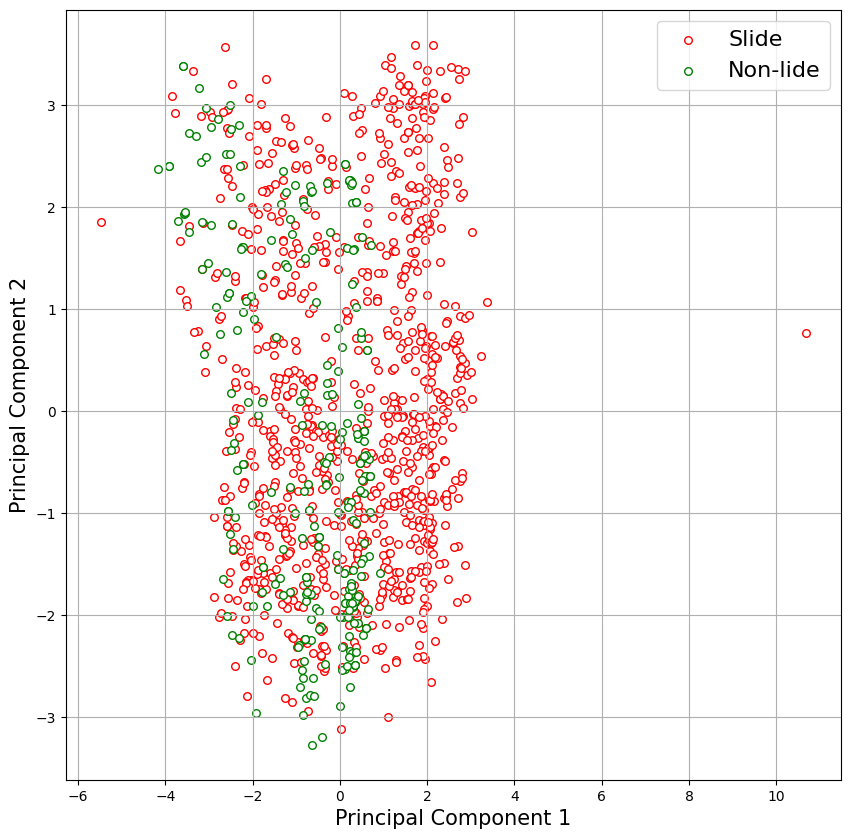

In [83]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = 'white',
#                c = color,
               edgecolors = color,
               s = 30,
#                alpha = 0.25
              )
ax.legend(['Slide','Non-lide'], fontsize =16)
ax.grid()
plt.savefig(os.path.join('drive/MyDrive/GovTech/FullFunctioning/figures','pca.png'), dpi = 300)

Splitting dataset for training and testing

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

Machine Learning Algorithms

In [85]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

Logistic Regression

Hyperparameter(s):


*   C (inverse of regularization strength)

In [86]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

Hyperparameter optimization

In [87]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8633398564905415
Best hyperparameters: {'C': 0.01}


Train on opmtimal hyperparameters

In [88]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(X_train,y_train.ravel())

Get predictions and probabilities on test set

In [89]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

Performance metrics

In [90]:

lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_proba[:,1])

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_proba[:,1])

lr_cls_precision, lr_cls_recall, lr_cls_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average=None, labels=[0,1])
print('Logistic Regression:')
print('\nConfusion matrix:\n',lr_conf_mat,'\n')
print('Accuracy:',lr_acc)
print('ROC AUC=%.4f' % (lr_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (lr_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (lr_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (lr_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (lr_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (lr_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (lr_cls_f1[1]))

Logistic Regression:

Confusion matrix:
 [[ 87  20]
 [ 42 340]] 

Accuracy: 0.8732106339468303
ROC AUC=0.9364
Precision on (Landslide = 0) = 0.6744 
Recall on (Landslide = 0) = 0.8131 
F1 on (Landslide = 0) = 0.7373
Precision on (Landslide = 1) = 0.9444 
Recall on (Landslide = 1) = 0.8901 
F1 on (Landslide = 1) = 0.9164 


Support Vector Machine

Hyperparameter(s):

*   C (inverse of regularization strength)
*   kernel (Specifies kernel type from, ‘poly’, ‘rbf’, ‘sigmoid’)
*   Gamma (kernel coefficient for 'rbf', 'poly' and 'sigmoid'

Hyperparameter optimization

In [91]:
model = SVC(random_state=0, probability=True)

param_grid={'C':np.logspace(-3,3,7),
            'kernel': ['poly', 'rbf', 'sigmoid'],
          'gamma': [0.001, 0.01, 1],
           }
grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C
gamma = grid.best_estimator_.gamma
kernel = grid.best_estimator_.kernel

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8879787531450936
Best hyperparameters: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}


Train on opmtimal hyperparameters

In [92]:
svm = SVC(random_state =0, probability = True, C=C,  gamma =gamma, kernel = kernel).fit(X_train,y_train.ravel())

Get predictions and probabilities on test set

In [93]:
svm_pred = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)

Performance metrics

In [94]:
svm_conf_mat = confusion_matrix(y_test, svm_pred)
svm_acc = accuracy_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_proba[:,1])

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_proba[:,1])

svm_cls_precision, svm_cls_recall, svm_cls_f1, _ = precision_recall_fscore_support(y_test, svm_pred, average=None, labels=[0,1])
print('Support Vector Machine :')
print('\nConfusion matrix:\n',svm_conf_mat,'\n')
print('Accuracy:',svm_acc)
print('ROC AUC=%.4f' % (svm_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (svm_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (svm_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (svm_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (svm_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (svm_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (svm_cls_f1[1]))

Support Vector Machine :

Confusion matrix:
 [[ 88  19]
 [ 27 355]] 

Accuracy: 0.9059304703476483
ROC AUC=0.9513
Precision on (Landslide = 0) = 0.7652 
Recall on (Landslide = 0) = 0.8224 
F1 on (Landslide = 0) = 0.7928
Precision on (Landslide = 1) = 0.9492 
Recall on (Landslide = 1) = 0.9293 
F1 on (Landslide = 1) = 0.9392 


Random Forest

Hyperparameter(s):


*   n_estimators
*   max_features
*   max_depth
*   criterion

Hyperparameter optimization

In [95]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best score: 0.9071009225608051
Best hyperparameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 30}


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train on optimal hyperparameters

In [96]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train, y_train.ravel())


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Get predictions and probabilities on test set



In [97]:
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

Performance metrics

In [98]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_proba[:,1])

rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1])

print('Random Forest :')
print('\nConfusion matrix:\n',rf_conf_mat,'\n')
print('Accuracy:',rf_acc)
print('ROC AUC=%.4f' % (rf_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (rf_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (rf_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (rf_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (rf_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (rf_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (rf_cls_f1[1]))

Random Forest :

Confusion matrix:
 [[ 91  16]
 [ 27 355]] 

Accuracy: 0.9120654396728016
ROC AUC=0.9632
Precision on (Landslide = 0) = 0.7712 
Recall on (Landslide = 0) = 0.8505 
F1 on (Landslide = 0) = 0.8089
Precision on (Landslide = 1) = 0.9569 
Recall on (Landslide = 1) = 0.9293 
F1 on (Landslide = 1) = 0.9429 


Export trained and tested models

In [99]:
import joblib

joblib.dump(lr, os.path.join('drive/MyDrive/GovTech/FullFunctioning/models','lr.pkl'), compress=9)
joblib.dump(svm, os.path.join('drive/MyDrive/GovTech/FullFunctioning/models','svm.pkl'), compress=9)
joblib.dump(rf, os.path.join('drive/MyDrive/GovTech/FullFunctioning/models','rf.pkl'), compress=9)

['drive/MyDrive/GovTech/FullFunctioning/models/rf.pkl']

Export performance metrics of models

In [100]:
perf_metr = pd.DataFrame(index = [
                        'Logistic Regression',
                        'Support Vector Machine',
                        'Random Forest',
                       ],
             columns = ['Accuracy', 
                        'ROC AUC', 
                        'Precision on Landlside=0', 
                        'Recall on Landlside=0', 
                        'F1-score on Landlside=0', 
                        'Precision on Landlside=1', 
                        'Recall on Landlside=1', 
                        'F1-score on Landlside=1']
            )

In [101]:
lr_perf_metr = pd.Series([lr_acc, lr_roc_auc, lr_cls_precision[0], lr_cls_recall[0], lr_cls_f1[0], lr_cls_precision[0],lr_cls_recall[0], lr_cls_f1[0]])
svm_perf_metr = pd.Series([svm_acc, svm_roc_auc, svm_cls_precision[0], svm_cls_recall[0], svm_cls_f1[0], svm_cls_precision[0],svm_cls_recall[0], svm_cls_f1[0]])
rf_perf_metr = pd.Series([rf_acc, rf_roc_auc, rf_cls_precision[0], rf_cls_recall[0], rf_cls_f1[0], rf_cls_precision[0],rf_cls_recall[0], rf_cls_f1[0]])

In [102]:
perf_metr.loc['Logistic Regression',:] = lr_perf_metr.values
perf_metr.loc[ 'Support Vector Machine',:] = svm_perf_metr.values
perf_metr.loc['Random Forest',:] = rf_perf_metr.values

In [103]:
perf_metr = perf_metr.astype(float).round(4)

In [104]:
perf_metr

,Accuracy,ROC AUC,Precision on Landlside=0,Recall on Landlside=0,F1-score on Landlside=0,Precision on Landlside=1,Recall on Landlside=1,F1-score on Landlside=1
Logistic Regression,0.8732,0.9364,0.6744,0.8131,0.7373,0.6744,0.8131,0.7373
Support Vector Machine,0.9059,0.9513,0.7652,0.8224,0.7928,0.7652,0.8224,0.7928
Random Forest,0.9121,0.9632,0.7712,0.8505,0.8089,0.7712,0.8505,0.8089


In [105]:
perf_metr.to_csv(os.path.join('performance_metrics.csv'))

ROC-AUC curves

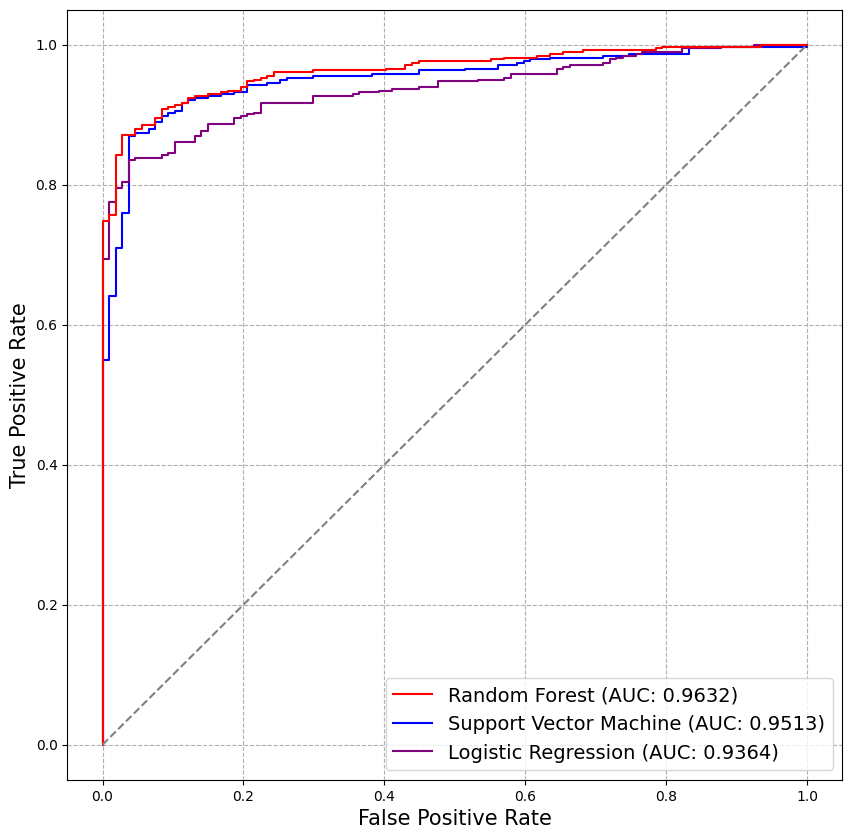

In [110]:
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])

fig, ax = plt.subplots(1, figsize=(10,10))

# fig.figure(figsize=(10,10))

# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(svm_fpr, svm_tpr,  color = 'blue', label='Support Vector Machine (AUC: ' + str(np.round(svm_roc_auc,4))+')')
ax.plot(lr_fpr, lr_tpr,  color = 'purple', label='Logistic Regression (AUC: ' + str(np.round(lr_roc_auc,4))+')')
ax.plot(rf_fpr, rf_tpr,  color = 'red', label='Random Forest (AUC: ' + str(np.round(rf_roc_auc,4))+')')
ax.plot([0,1],[0,1], color='grey', linestyle='dashed')

# axis labels
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)

# show the legend
# plt.legend()

handles,labels = ax.get_legend_handles_labels()


handles = [handles[2], handles[0], handles[1]]
labels = [labels[2], labels[0], labels[1]]

ax.grid(linestyle='dashed')
ax.legend(handles,labels, fontsize=14)

plt.savefig(os.path.join('drive/MyDrive/GovTech/FullFunctioning/figures','roc-auc.png'), dpi = 300)
# show the plot
plt.show()

Decision Tree for visualization

(Graphviz needs to be installed for visualizing decision trees)

In [111]:
# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Code']].values

In [112]:
X

array([[7., 1., 0., ..., 0., 0., 0.],
       [4., 1., 0., ..., 0., 0., 0.],
       [7., 1., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

In [113]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

Hyperparameter optimization

In [115]:
np.arange(10,30,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [116]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : np.arange(1,50),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Best score: 0.8866182089274066
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto'}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Train on optimal hyperparameters

In [117]:
dt_viz = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(X_train, y_train.ravel())


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Get predictions and probabilities on test set

In [118]:
dt_viz_pred = dt_viz.predict(X_test)
dt_viz_proba = dt_viz.predict_proba(X_test)

Performance metrics

In [119]:
dt_viz_conf_mat = confusion_matrix(y_test, dt_viz_pred)
dt_viz_acc = accuracy_score(y_test, dt_viz_pred)
dt_viz_roc_auc = roc_auc_score(y_test, dt_viz_proba[:,1])

dt_viz_fpr, dt_viz_tpr, _ = roc_curve(y_test, dt_viz_proba[:,1])
dt_viz_precision, dt_viz_recall, _ = precision_recall_curve(y_test, dt_viz_proba[:,1])

dt_viz_cls_precision, dt_viz_cls_recall, dt_viz_cls_f1, _ = precision_recall_fscore_support(y_test, dt_viz_pred, average=None, labels=[0,1])

print('Decision Tree for Visualization:')
print('\nConfusion matrix:\n',dt_viz_conf_mat,'\n')
print('Accuracy:',dt_viz_acc)
print('ROC AUC=%.4f' % (dt_viz_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (dt_viz_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (dt_viz_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (dt_viz_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (dt_viz_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (dt_viz_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (dt_viz_cls_f1[1]))

Decision Tree for Visualization:

Confusion matrix:
 [[ 76  31]
 [ 39 343]] 

Accuracy: 0.8568507157464212
ROC AUC=0.8664
Precision on (Landslide = 0) = 0.6609 
Recall on (Landslide = 0) = 0.7103 
F1 on (Landslide = 0) = 0.6847
Precision on (Landslide = 1) = 0.9171 
Recall on (Landslide = 1) = 0.8979 
F1 on (Landslide = 1) = 0.9074 


In [121]:
from sklearn.tree import export_graphviz

export_graphviz(dt_viz, out_file=os.path.join('drive/MyDrive/GovTech/FullFunctioning/models','tree_viz.dot'), 
                feature_names = features,
#                 class_names = ['Landslide',]iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [128]:
# Convert to png using system command (requires Graphviz) 
#  if graphviz not install use tree.dot file to generate png or comment out the remaining code
from subprocess import call
call(['dot', '-Tpng', 'models/tree_viz.dot', '-o', 'figures/tree_viz.png', '-Gdpi=300'])

2

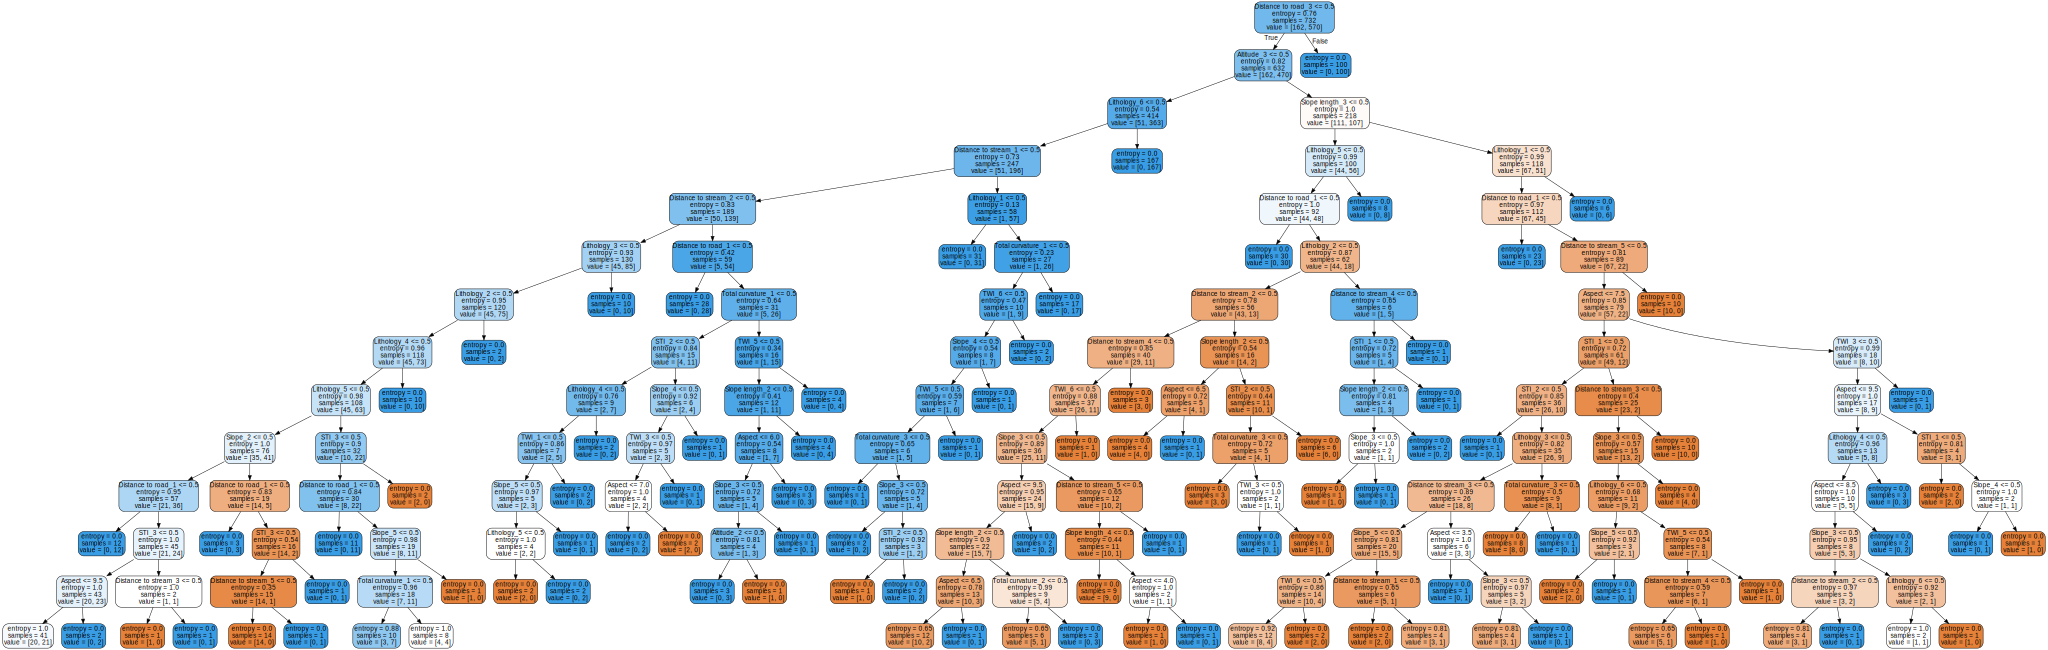

In [131]:
import graphviz

dot_file = "drive/MyDrive/GovTech/FullFunctioning/models/tree_viz.dot"

with open(dot_file) as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

